# BUILD MODEL USING DECISION TREE ALGORITHM

# load the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
dt=pd.DataFrame(data=data.data,columns=data.feature_names)
dt['species']=data.target
dt.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
dt.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [5]:
dt['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [6]:
# separting the dependent and independent varibales
x=dt.drop('species',axis=1)
y=dt.species

In [7]:
# spliting the dataset into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


# building the model using support vector machine:

In [8]:
dct_model=DecisionTreeClassifier()
dct_model

DecisionTreeClassifier()

In [9]:
dct_model.fit(x_train,y_train)

DecisionTreeClassifier()

# model accuracy

In [10]:
y_pred=dct_model.predict(x_train)
acc=accuracy_score(y_pred,y_train)*100
print('Accuracy of model on training data is: ',f"{acc}%") 

print()
print('***********************')
print()


y_pred=dct_model.predict(x_test)
acc=accuracy_score(y_pred,y_test).round(3)*100
print('Accuracy of model on testing data is: ',f"{acc}%")


Accuracy of model on training data is:  100.0%

***********************

Accuracy of model on testing data is:  97.8%


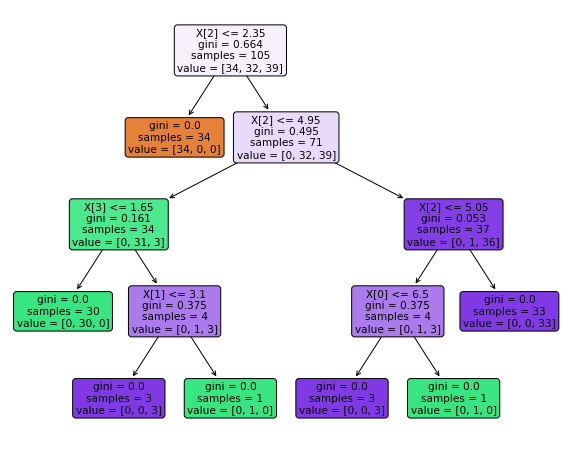

In [11]:
plt.figure(figsize=(10,8))
graph=tree.plot_tree(dct_model,rounded=True,filled=True)
plt.show()

# As my model is overfitting due to training data accuracy so now I apply pre-pruning technique by using hyperperameter tunning to overcome the overfitting probllem 

In [12]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion' : ["gini", "entropy"],
            'splitter' : ["best", "random"],
            'max_depth':[0,1,2,3,4,5,6,7,8,9,10,11,12,12],
            'random_state':[0,1,2,3,4,5,6,7,8,9,10,11,12,13]}
new_model=GridSearchCV(estimator=dct_model,param_grid=parameters,cv=5)
new_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       12],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13],
                         'splitter': ['best', 'random']})

In [13]:
print(new_model.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'random_state': 0, 'splitter': 'random'}


In [14]:
y_new_pred=new_model.predict(x_train)
acc=accuracy_score(y_new_pred,y_train).round(3)*100
print("Accuracy of model on testing data after GSCV is  ",f"{acc}%")

Accuracy of model on testing data after GSCV is   97.1%


In [15]:
y_new_pred=new_model.predict(x_test)
acc=accuracy_score(y_new_pred,y_test).round(3)*100
print("Accuracy of model on testing data after GSCV is  ",f"{acc}%")

Accuracy of model on testing data after GSCV is   95.6%
